In [1]:
import os
import re
import tables as tb
import brian2 as br
import matplotlib as mpl
import matplotlib.pyplot as plt

from brian2 import numpy as np
from brian2 import um, mm, cm, meter
from brian2 import mV, ms, second, ohm, siemens, msiemens, farad, ufarad

import pyoelectricity as pel

# Ephaptic coupling at end-end synapses

In [2]:
datapath = 'simulation/end-end/'
print(datapath)
result_filenames = [f for f in sorted(os.listdir(datapath), reverse=True)
                    if re.search(r'2k.*.h5', f)]
                   #]
                    #if re.search(r'2k.*-(tm4|hh).*.h5', f)]
    
                    #if re.search(r'500.*-(tm|hh)*.h5', f)]
                    #if re.search(r'800.*-(tm|rtmb|rtms|hh)', f)]

for i, filename in enumerate(result_filenames):
    morpho = filename.split('.')[-2][-2:]
    model = filename.split('.')[-2].split('spine-')[-1][:-2]
    #lbl1, lbl2 = filename.split('.')[-2][-2:]
    #model, morpho = lbl2[:-2], lbl2[-2:]
    #if model == 'tm':
    print(f'{i:2d}: {filename:35s} {model:6s} {morpho:3s}')

simulation/end-end/
 0: eeS-2k-.1us-.3mmspine-tm450ss.h5    tm450  ss 
 1: eeS-2k-.1us-.3mmspine-tm450sb.h5    tm450  sb 
 2: eeS-2k-.1us-.3mmspine-tm450bs.h5    tm450  bs 
 3: eeS-2k-.1us-.3mmspine-tm450bb.h5    tm450  bb 
 4: eeS-2k-.1us-.3mmspine-tm1200ss.h5   tm1200 ss 
 5: eeS-2k-.1us-.3mmspine-tm1200sb.h5   tm1200 sb 
 6: eeS-2k-.1us-.3mmspine-tm1200bs.h5   tm1200 bs 
 7: eeS-2k-.1us-.3mmspine-tm1200bb.h5   tm1200 bb 
 8: eeS-2k-.1us-.3mmspine-hhss.h5       hh     ss 
 9: eeS-2k-.1us-.3mmspine-hhsb.h5       hh     sb 
10: eeS-2k-.1us-.3mmspine-hhbs.h5       hh     bs 
11: eeS-2k-.1us-.3mmspine-hhbb.h5       hh     bb 
12: ee-2k-.1us-.3mmspine-tm450ss.h5     tm450  ss 
13: ee-2k-.1us-.3mmspine-tm450sb.h5     tm450  sb 
14: ee-2k-.1us-.3mmspine-tm450bs.h5     tm450  bs 
15: ee-2k-.1us-.3mmspine-tm450bb.h5     tm450  bb 
16: ee-2k-.1us-.3mmspine-tm1200ss.h5    tm1200 ss 
17: ee-2k-.1us-.3mmspine-tm1200sb.h5    tm1200 sb 
18: ee-2k-.1us-.3mmspine-tm1200bs.h5    tm1200 bs 
19: ee-2k-.

In [7]:
e_result_filenames = [f for f in result_filenames
                      if re.search(r'ee-.*2k.*(ss|bb).h5', f)]

for e in (e_result_filenames):
    print(e)
e_results = {f:pel.get_result(datapath+f) for f in e_result_filenames}

ee-2k-.1us-.3mmspine-tm450ss.h5
ee-2k-.1us-.3mmspine-tm450bb.h5
ee-2k-.1us-.3mmspine-tm1200ss.h5
ee-2k-.1us-.3mmspine-tm1200bb.h5
ee-2k-.1us-.3mmspine-hhss.h5
ee-2k-.1us-.3mmspine-hhbb.h5


# Morphology - compartment positions

ee-2k-.1us-.3mmspine-tm450ss.h5 (2000, 60020)
ee-2k-.1us-.3mmspine-tm1200bb.h5 (2000, 60020)


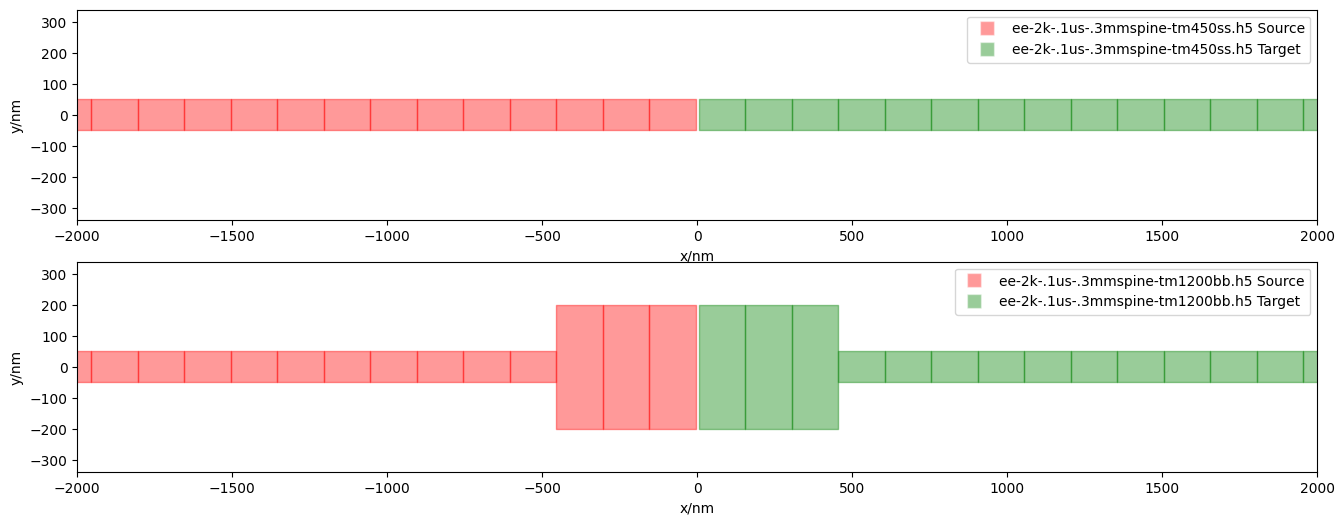

In [50]:
Xresult_filenames =  [e_result_filenames[0], e_result_filenames[3]]
fig, axs = plt.subplots(len(Xresult_filenames), 1, figsize=(16,6))
nm = br.nmeter

for result_file, ax in zip(Xresult_filenames, axs):
    result = e_results[result_file]
    print(result_file, result['source_v'].shape)
    
    source_patchs = []
    dx = (result['source_x'][1]-result['source_x'][0])/nm
    x0 = (result['source_x'][-1] + result['target_x'][0])/2/nm
    for x, y, d in zip(result['source_x']/nm -x0,
                       result['source_y']/nm,
                       result['source_d']/nm):
        x_off = dx/2
        y_off = d/2
        source_patchs.append(plt.Rectangle((x-x_off, y-y_off), dx, d) )
    ax.add_collection(mpl.collections.PatchCollection(source_patchs, color='red', alpha=0.4, label="Source"))    
    
    target_patchs = []
    dx = (result['target_x'][1]-result['target_x'][0])/nm
    for x, y, d in zip(result['target_x']/nm -x0,
                       result['target_y']/nm,
                       result['target_d']/nm):
        x_off = dx/2
        y_off = d/2
        target_patchs.append(plt.Rectangle((x-x_off, y-y_off), dx, d) )
    ax.add_collection(mpl.collections.PatchCollection(target_patchs, color='green', alpha=0.4, label="Target"))    

    ax.axis('equal')
    #ax.set_xlim(result['source_x'][-1]/nm - 2 , result['target_x'][1]/nm +2)
    ax.set_xlim(-2000 , 2000)
    ax.set_ylim(-300, 300)
    ax.set_xlabel('x/nm')
    ax.set_ylabel('y/nm')
    legend_elements = [mpl.lines.Line2D([0], [0], marker='s', color='w',
                                        markerfacecolor='red', markersize=10, alpha=0.4, label=result_file+' Source'),
                       mpl.lines.Line2D([0], [0], marker='s', color='w',
                                        markerfacecolor='green', markersize=10, alpha=0.4, label=result_file+' Target')]
    ax.legend(handles=legend_elements)

plt.show()

In [39]:
print('C-center intra-dist: ', (result['source_x'][-1] - result['source_x'][-2]).in_unit(br.nmeter, 0))
print('C-center gap-dist: ', (result['source_x'][-1] - result['target_x'][0]).in_unit(br.nmeter, 0))

C-center intra-dist:  150. nm
C-center gap-dist:  -160. nm


# Overview

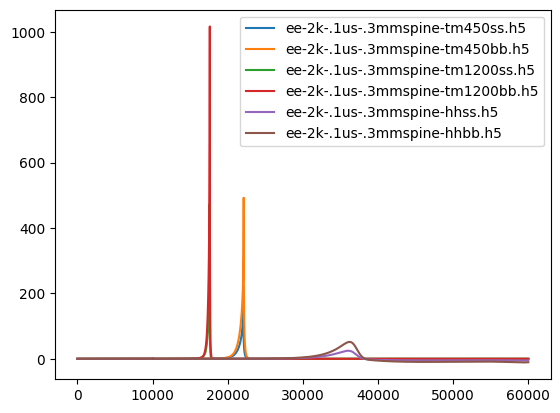

In [54]:
for rfn in e_result_filenames:
    result = e_results[rfn]
    plt.plot(result['v_ext_v'][0]/br.uvolt, label = rfn)
plt.legend()

   79 = 11.8 um |  22108 = 2.2 ms |  4.1 uV | >-<  0.16 um


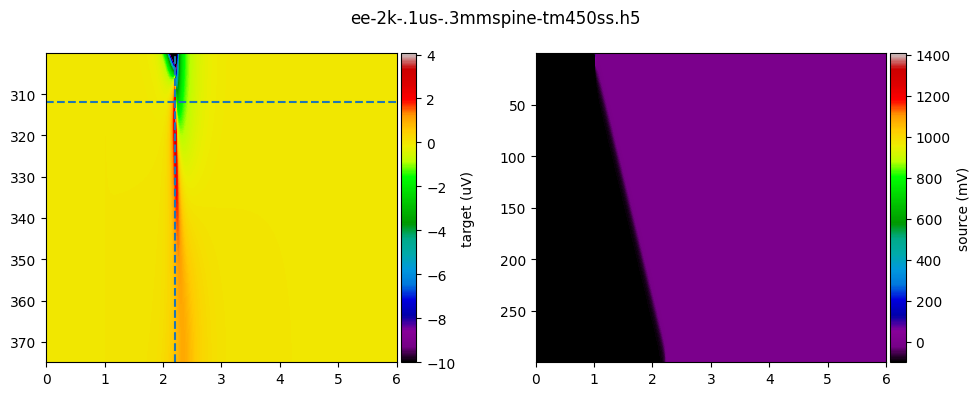

In [32]:
# first check 
def doubleimg(title, result):
    fig, axs = plt.subplots(1,2, figsize=(10, 4))
    plt.suptitle(title)
    
    im0 = axs[0].imshow(result['target_v']/br.uvolt,
               extent=[(result['target_t'][0])/br.ms,
                       (result['target_t'][-1])/br.ms,
                       (result['target_x'][-1])/br.um,
                       (result['target_x'][0])/br.um,
                       ],
               aspect='auto',
               interpolation='none',
               vmin=-10,
               cmap='nipy_spectral'
              )
    ix, it = find_dist_depol(result)
    axs[0].axhline(result['target_x'][ix]/br.um, ls = '--')
    axs[0].axvline(result['target_t'][it]/br.ms, ls = '--')
    #axs[0].set_xlim(result['target_t'][it]/br.ms, ls = '--')
    
    fig.colorbar(im0, ax=axs[0], pad=0.01, label='target (uV)')

    # im1 = axs[1].imshow(result['source_v']/br.mV,
    #            extent=[(result['source_t'][0])/br.ms,
    #                    (result['source_t'][-1])/br.ms,
    #                    (result['source_x'][-1])/br.um,
    #                    (result['source_x'][0])/br.um,
    #                    ],
    #            aspect='auto',
    #            interpolation='none',
    #            cmap='nipy_spectral'
    #           )
    im1 = axs[1].imshow(result['v_ext_v']/br.mV,
               extent=[(result['v_ext_t'][0])/br.ms,
                       (result['source_t'][-1])/br.ms,
                       (result['source_x'][-1])/br.um,
                       (result['source_x'][0])/br.um,
                       ],
               aspect='auto',
               interpolation='none',
               cmap='nipy_spectral'
              )

    fig.colorbar(im1, ax=axs[1], pad=0.01, label='source (mV)')
    #axs[0].set_xlim(2.1, 2.3)
    fig.tight_layout()
    
def find_dist_depol(result):
    #x_coff = (result['target_x'] - result['target_x'][0]) - 
    v2 = result['target_v'][:,result['target_t']<(3.8*ms)]
    ix, it = np.unravel_index(np.argmax(v2, axis=None), v2.shape)
    x_um = (result['target_x'][ix] - result['target_x'][0])/br.um
    t_ms = (result['target_t'][it])/br.ms
    vmax_uv = v2.max()/br.uvolt
    comp_dist = result['target_x'][0] - result['source_x'][-1]

    print(f"{ix:5d} = {x_um:4.1f} um | {it:6d} ={t_ms:4.2} ms | {vmax_uv:4.1f} uV | >-< {comp_dist/br.um:5.3} um")
    return ix, it

#doubleimg('1', e_)
for lbl, res in e_results.items():
    doubleimg(lbl, res)
    break

NameError: name 'scaling_f' is not defined

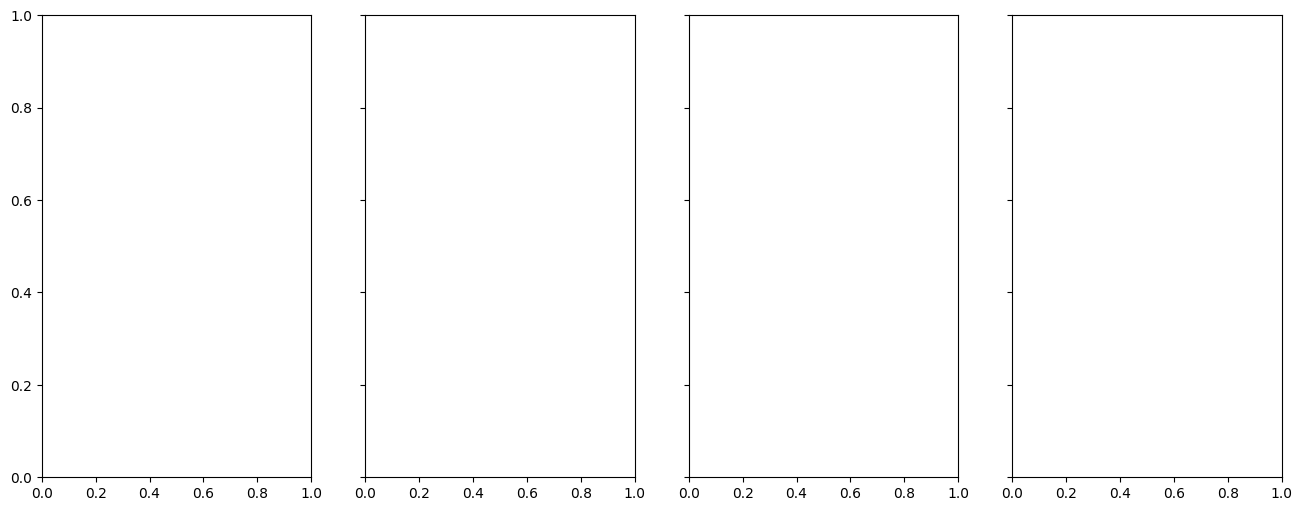

In [24]:
fig, axs = plt.subplots(1,4, figsize=(16,6), sharey=True, sharex=True)

for result_file in result_filenames:
    if re.search('ss.h5', result_file):
        morpho_lbl = '-- --'
        ax = axs[0]
    elif re.search('bs.h5', result_file):
        ax = axs[1]
    elif re.search('sb.h5', result_file):
        ax = axs[2]
    elif re.search('bb.h5', result_file):
        ax = axs[3]
        
    if re.search('-hh', result_file):
        ls = ':'
    elif re.search('-tm', result_file):
        ls = '-'
    elif re.search('-rtm', result_file):
        ls = '--'
    else:
        ls='-.'
        
    result = pel.get_result(datapath+result_file)
    

    morpho = result_file.split('.')[-2][-2:]
    model = label = result_file.split('.')[-2].split('spine-')[-1][:-2]
    
    
    ln = ax.plot(result['target_x']/um,
                 result['target_v'].max(1)/mV*scaling_f,
                 ls=ls)#,
                 #label=result_file[5:-3])
    ax.plot(result['target_x']/um,
            result['target_v'].min(1)/mV*scaling_f,
            ls=ls,
            label=label,
            color=ln[0].get_color())

    ax.set_xlabel('x/um')
    ax.legend()

ax.set_xlim(299, 325)    
ax.set_ylim(-0.03, 0.05)    
axs[0].set_ylabel('$V_m$/mV')
plt.tight_layout()
plt.grid()

# Final Plot

## previous

Mcase: ss
hh         33 305.035 um
tm450      33 305.035 um
Mcase: bs
hh         33 305.035 um
tm450      33 305.035 um
Mcase: bb
hh         33 305.035 um
tm450      33 305.035 um


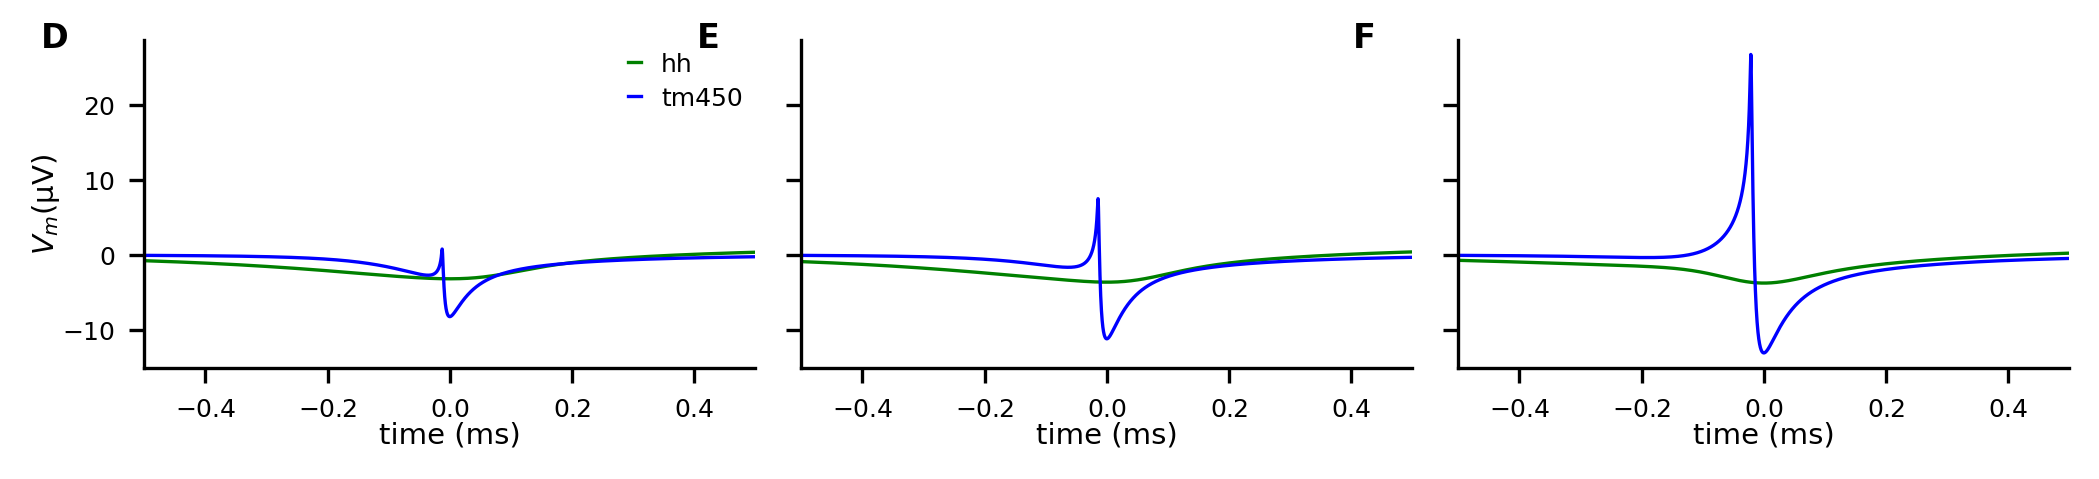

In [121]:
with plt.style.context('plot_style.txt'):
    cm = 1/2.54 # 11.4 or 17.8
    figM, axsM = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(17.8*cm,4*cm))
    for morpho_case, axM in zip(['ss', 'bs', 'bb'], axsM):
        print('Mcase:', morpho_case)
        for result_file in sorted(result_filenames):
            morpho = result_file.split('.')[-2][-2:]
            model = result_file.split('.')[-2].split('spine-')[-1][:-2]
            if morpho_case != morpho:
                continue
            if re.search('(tm9|rtm|ms)', model):
                continue
            elif re.search('hh', model):
                color = 'green'
            else:
                color='blue'
                
                
            result = pel.get_result(datapath+result_file)#, downsampling_factor=10)
            #
            v, t = result['target_v'], result['target_t']

            ix = np.abs(result['target_x']-(result['target_x'][0]+5*um)).argmin()

            t_0 = t[v[ix, :].argmin()]
            
            print(f"{model:10s} {ix} {result['target_x'][ix]}")

            lbl = model
            axM.plot((t-t_0)/ms, v[ix, :]/br.uvolt, color=color, label=lbl)# + ' ' + result['target_x'][ix_max])
            #break
        #break
            
    axsM[0].set_ylabel("$V_m $($\mathrm{\mu}$V)")
    axsM[0].legend()
    axsM[0].set_xlim(-0.5, 0.5)
    axsM[0].set_xlabel("time (ms)")
    axsM[1].set_xlabel("time (ms)")
    axsM[2].set_xlabel("time (ms)")
    
    plt.tight_layout()
    for ax, l in zip(axsM, ['D', 'E', 'F']):
        X = ax.get_position().x0 - 0.05
        Y = 0.90 #ax.get_position().y1
        ax.annotate(l, fontsize=8,family = 'sans-serif', weight = 'bold',
                    xycoords="subfigure fraction", 
                    xy=(X, Y)) 
    figM.savefig('Fig4-DEF.svg', bbox_inches='tight')
    plt.show()

In [74]:
v = result['target_v']
v.min(), v.max()
np.unravel_index(np.argmin(v, axis=None), v.shape)

(0, 222)

## Other Version

Mcase: ss
ss hh simulation/end-end/ee-2k-.1us-.3mmspine-hhss.h5
hh         33 305.035 um
ss tm1200 simulation/end-end/ee-2k-.1us-.3mmspine-tm1200ss.h5
tm1200     33 305.035 um
ss tm450 simulation/end-end/ee-2k-.1us-.3mmspine-tm450ss.h5
tm450      33 305.035 um
ss hh simulation/end-end/ee-500-.1us-.3mmspine-hhss.h5
hh         8 305.11 um
ss tm1200 simulation/end-end/ee-500-.1us-.3mmspine-tm1200ss.h5
tm1200     8 305.11 um
ss tm450 simulation/end-end/ee-500-.1us-.3mmspine-tm450ss.h5
tm450      8 305.11 um
Mcase: bb
bb hh simulation/end-end/ee-2k-.1us-.3mmspine-hhbb.h5
hh         33 305.035 um
bb tm1200 simulation/end-end/ee-2k-.1us-.3mmspine-tm1200bb.h5
tm1200     33 305.035 um
bb tm450 simulation/end-end/ee-2k-.1us-.3mmspine-tm450bb.h5
tm450      33 305.035 um
bb hh simulation/end-end/ee-500-.1us-.3mmspine-hhbb.h5
hh         8 305.11 um
bb tm1200 simulation/end-end/ee-500-.1us-.3mmspine-tm1200bb.h5
tm1200     8 305.11 um
bb tm450 simulation/end-end/ee-500-.1us-.3mmspine-tm450bb.h5
tm450

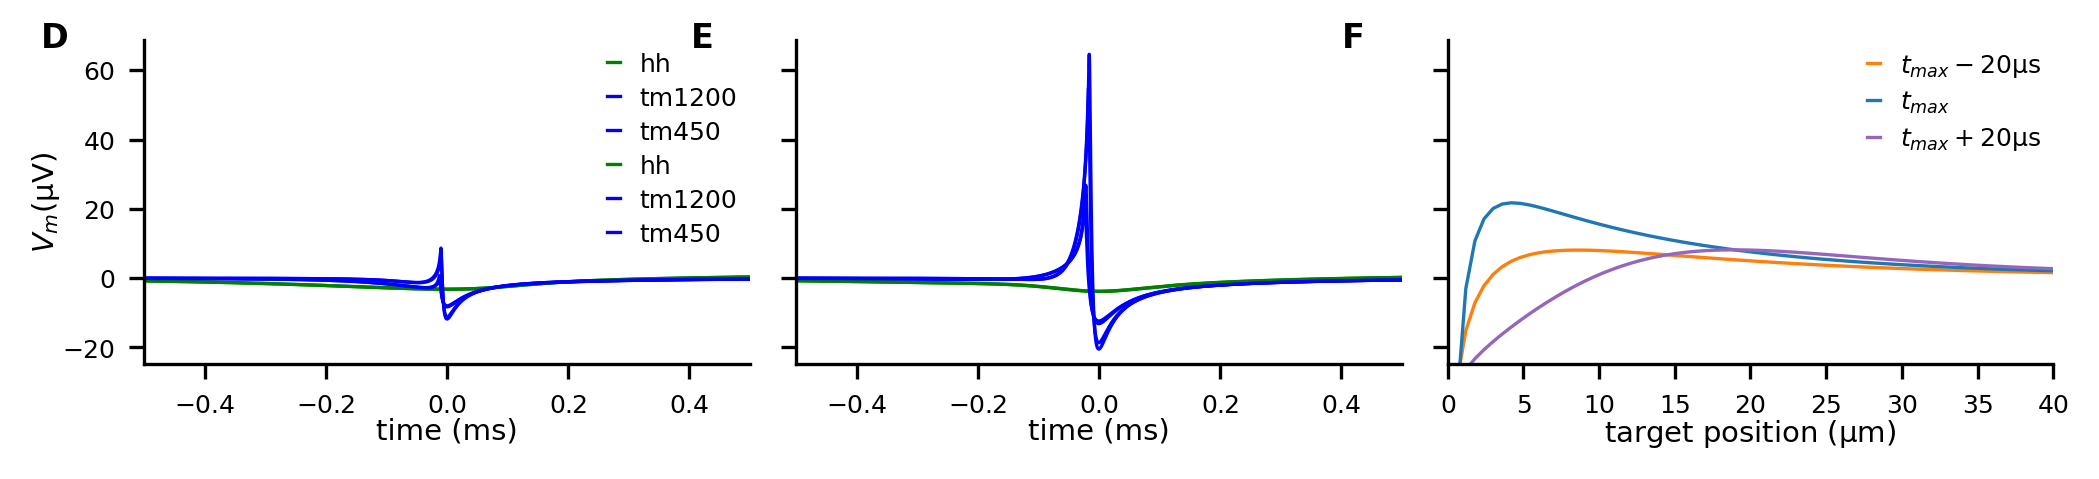

In [152]:
with plt.style.context('plot_style.txt'):
    cm = 1/2.54 # 11.4 or 17.8
    #figM, axsM = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(17.8*cm,4*cm))
    figM, axsM = plt.subplots(1, 3, sharey=True, figsize=(17.8*cm,4*cm))
    for morpho_case, axM in zip(['ss', 'bb'], axsM):
        print('Mcase:', morpho_case)
        for result_file in sorted(result_filenames):
            morpho = result_file.split('.')[-2][-2:]
            model = result_file.split('.')[-2].split('spine-')[-1][:-2]
            if morpho_case != morpho:
                continue
            if re.search('(tm9|rtm|ms)', model):
                continue
            elif re.search('hh', model):
                color = 'green'
            else:
                color='blue'
                
            print(morpho_case, model, datapath+result_file)#, downsampling_factor=10)
            result = pel.get_result(datapath+result_file)#, downsampling_factor=10)
            #
            v, t = result['target_v'], result['target_t']

            ix = np.abs(result['target_x']-(result['target_x'][0]+5*um)).argmin()

            t_0 = t[v[ix, :].argmin()]
            
            print(f"{model:10s} {ix} {result['target_x'][ix]}")

            lbl = model
            axM.plot((t-t_0)/ms, v[ix, :]/br.uvolt, color=color, label=lbl)# + ' ' + result['target_x'][ix_max])
            #break
        #break
            
            
    axsM[0].set_ylabel("$V_m $($\mathrm{\mu}$V)")
    axsM[0].legend()
    axsM[0].set_xlim(-0.5, 0.5)
    axsM[1].set_xlim(-0.5, 0.5)
    axsM[0].set_xlabel("time (ms)")
    axsM[1].set_xlabel("time (ms)")
    
    
    v = result['target_v']/br.uvolt
    i_x, i_t = np.unravel_index(np.argmin(v, axis=None), v.shape)
    x0, t0 = result['target_x'][i_x], result['target_t'][i_t]
    x=200
    xs = (result['target_x'] - result['target_x'].min())/br.um
    ylims = axsM[0].get_ylim()
    axsM[2].plot(xs, v[:,i_t-x], color='#ff7f0e', label = '$t_{max} - 20\\mathrm{\mu s}$')
    axsM[2].plot(xs, v[:,i_t], color='#1f77b4', label = '$t_{max}$')
    axsM[2].plot(xs, v[:,i_t+x], color='#9467bd', label = '$t_{max} + 20\\mathrm{\mu s}$')
    axsM[2].set_ylim(ylims)
    axsM[2].set_xlim(0,40)
    axsM[2].legend()
    
    axsM[2].set_xlabel("target position ($\\mathrm{\mu m}$)")
    
    plt.tight_layout()
    for ax, l in zip(axsM, ['D', 'E', 'F']):
        X = ax.get_position().x0 - 0.05
        Y = 0.90 #ax.get_position().y1
        ax.annotate(l, fontsize=8,family = 'sans-serif', weight = 'bold',
                    xycoords="subfigure fraction", 
                    xy=(X, Y))
    figM.savefig('Fig4-DEF2.svg', bbox_inches='tight')
    plt.show()

In [129]:
# "/home/ms/bucket/collision-glab/simulation/end-end/simulation/end-end/XXXXee-2k-.1us-.3mmspine-hhss.h"
"/home/ms/bucket/collision-glab/simulation/end-end/"
# bucket/collision-glab/simulation/end-end/simulation/end-end/ee-2k-.1us-.3mmspine-hhss.h"

'/home/ms/bucket/collision-glab/simulation/end-end/simulation/end-end/ee-2k-.1us-.3mmspine-hhss.h'

In [ ]:
plt.plot(result[target_v])

## Other Version 2

In [4]:
# first check 
def doubleimg(title, result):
    fig, axs = plt.subplots(1,2, figsize=(10, 4))
    plt.suptitle(title)
    
    im0 = axs[0].imshow(result['target_v']/br.uvolt,
               extent=[(result['target_t'][0])/br.ms,
                       (result['target_t'][-1])/br.ms,
                       (result['target_x'][-1])/br.um,
                       (result['target_x'][0])/br.um,
                       ],
               aspect='auto',
               interpolation='none',
               vmin=-10,
               cmap='nipy_spectral'
              )
    ix, it = find_dist_depol(result)
    axs[0].axhline(result['target_x'][ix]/br.um, ls = '--')
    axs[0].axvline(result['target_t'][it]/br.ms, ls = '--')
    axs[0].set_xlim(result['target_t'][it]/br.ms, ls = '--')
    
    fig.colorbar(im0, ax=axs[0], pad=0.01, label='target (uV)')

    im1 = axs[1].imshow(result['source_v']/br.mV,
               extent=[(result['source_t'][0])/br.ms,
                       (result['source_t'][-1])/br.ms,
                       (result['source_x'][-1])/br.um,
                       (result['source_x'][0])/br.um,
                       ],
               aspect='auto',
               interpolation='none',
               cmap='nipy_spectral'
              )

    fig.colorbar(im1, ax=axs[1], pad=0.01, label='source (mV)')
    #axs[0].set_xlim(2.1, 2.3)
    fig.tight_layout()
    
def look(key, constell_key=''):
    result_file='ee%s-2k-.1us-.3mmspine-%s.h5'%(constell_key, key)
    result = pel.get_result(datapath+result_file)#, downsampling_factor=10)
    doubleimg(key, result)
    return result
    
def find_dist_depol(result):
    #x_coff = (result['target_x'] - result['target_x'][0]) - 
    v2 = result['target_v'][:,result['target_t']<(3.8*ms)]
    ix, it = np.unravel_index(np.argmax(v2, axis=None), v2.shape)
    x_um = (result['target_x'][ix] - result['target_x'][0])/br.um
    t_ms = (result['target_t'][it])/br.ms
    vmax_uv = v2.max()/br.uvolt
    comp_dist = result['target_x'][0] - result['source_x'][-1]

    print(f"{ix:5d} = {x_um:4.1f} um | {it:6d} ={t_ms:4.2} ms | {vmax_uv:4.1f} uV | >-< {comp_dist/br.um:5.3} um")
    return ix, it

  499 = 74.9 um |  37123 = 3.7 ms |  1.0 uV | >-<  0.16 um


TypeError: set_xlim() got an unexpected keyword argument 'ls'

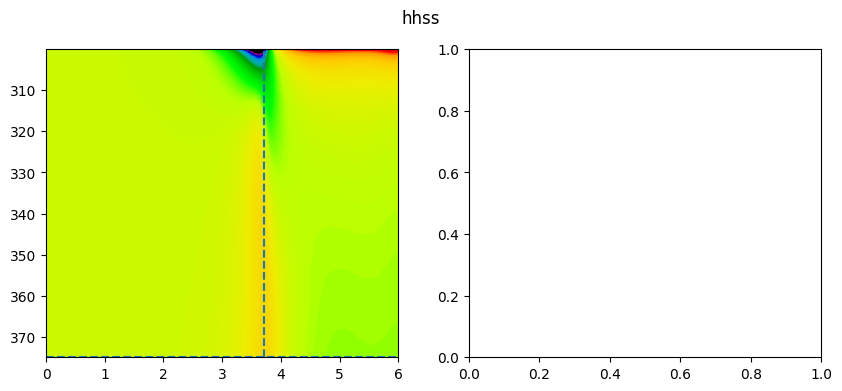

In [5]:
r_hhss = look('hhss')
r_hhbb = look('hhbb')
r_tm450ss = look('tm450ss')
r_tm450bb = look('tm450bb')
plt.show()

### The shorter target version

In [63]:
# first check 
if 0: 
    rS_hhss = look('hhss', constell_key='S')
    rS_hhbb = look('hhbb', constell_key='S')
    rS_tm450ss = look('tm450ss', constell_key='S')
    rS_tm450bb = look('tm450bb', constell_key='S')
    plt.show()

  499 = 7e+01 um  |  37123 =   3.7 ms
  178 = 3e+01 um  |  36476 =   3.6 ms
   79 = 1e+01 um  |  22108 =   2.2 ms
   23 = 3e+00 um  |  22139 =   2.2 ms
  499 = 3e+01 um  |  36207 =   3.6 ms
  499 = 3e+01 um  |  36544 =   3.7 ms
  499 = 3e+01 um  |  22241 =   2.2 ms
   59 = 4e+00 um  |  22139 =   2.2 ms


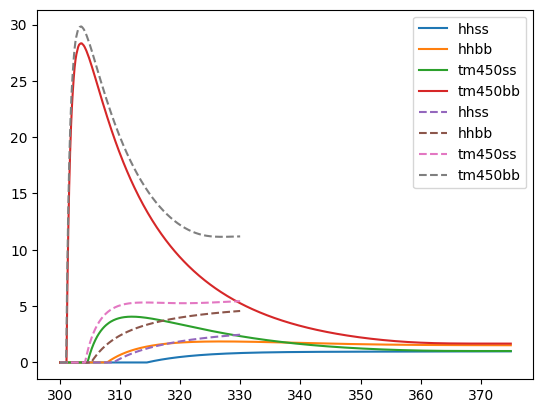

In [269]:
def pltmax(result, ax, **kwargs):
    v2 = result['target_v'][:,result['target_t']<(3.8*ms)]
    ix, it = np.unravel_index(np.argmax(v2, axis=None), v2.shape)
    x_um = (result['target_x'][ix] - result['target_x'][0])/br.um
    t_ms = (result['target_t'][it])/br.ms
    print(f"{ix:5d} = {x_um:4.1} um  | {it:6d} = {t_ms:5.2} ms")
    ax.plot(result['target_x']/br.um, v2.max(1)/br.uvolt, **kwargs)

fig, ax = plt.subplots()
pltmax(r_hhss, ax, label = 'hhss')
pltmax(r_hhbb, ax, label = 'hhbb')
pltmax(r_tm450ss, ax, label = 'tm450ss')
pltmax(r_tm450bb, ax, label = 'tm450bb')
pltmax(rS_hhss, ax, label = 'hhss', ls='--')
pltmax(rS_hhbb, ax, label = 'hhbb', ls='--')
pltmax(rS_tm450ss, ax, label = 'tm450ss', ls='--')
pltmax(rS_tm450bb, ax, label = 'tm450bb', ls='--')
plt.legend()
plt.show()

## Last Final Version

hh         i_x:79 pos_x:11.85 um   t0:3.77 ms
hh         i_x:23 pos_x:3.45 um    t0:3.72 ms
tm450      i_x:79 pos_x:11.85 um   t0:2.26 ms
tm450      i_x:23 pos_x:3.45 um    t0:2.23 ms


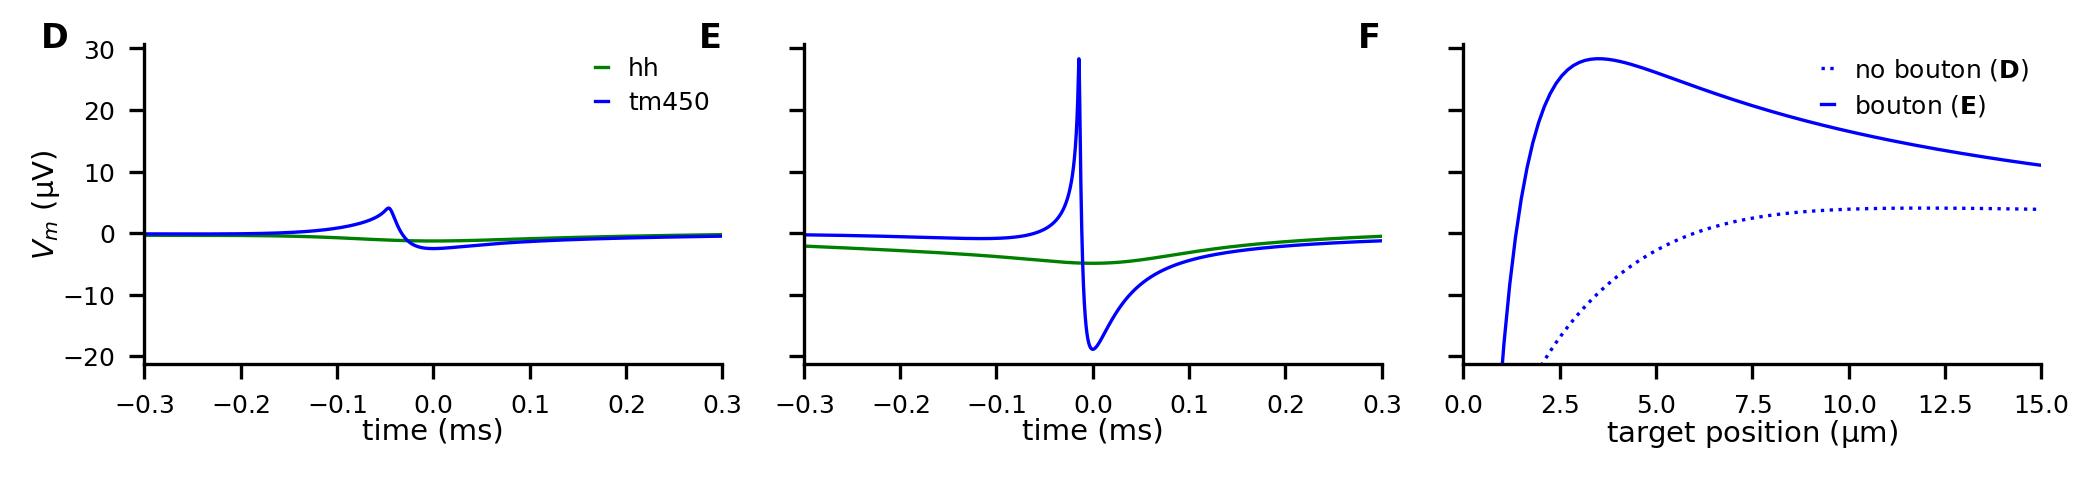

In [12]:
with plt.style.context('plot_style.txt'):
    cm = 1/2.54 # 11.4 or 17.8
    fig, axs = plt.subplots(1, 3, sharey=True, figsize=(17.8*cm,4*cm))
    
    def mk_ee_plt(result, model, ax, ix=None, **kwargs):
        v, t = result['target_v'], result['target_t']
        
        #ix = np.abs(result['target_x']-(result['target_x'][0]+5*um)).argmin()
        if ix is None:
            v2 = v[:,result['target_t']<(4*ms)]
            ix, it = np.unravel_index(np.argmax(v2, axis=None), v2.shape)
            t_0 = t[it]
        else:
            v2 = v[ix,:]
            it = v2.argmin()
            t_0 = t[it]

        print(f"{model:10s} i_x:{ix} pos_x:{(result['target_x'][ix] - result['target_x'][0]).in_best_unit(5):10}"
              +f" t0:{t_0.in_best_unit(2)}")
        
        ax.plot((t-t_0)/ms, v[ix, :]/br.uvolt, label=model, **kwargs)
        return result
            
    r_sshh = mk_ee_plt(
        model='hh',
        ix=79,
        result=e_results['ee-2k-.1us-.3mmspine-hhss.h5'],
        ax=axs[0], color = 'green')
    r_bbhh = mk_ee_plt(
        model="hh",
        ix=23,
        result=e_results["ee-2k-.1us-.3mmspine-hhbb.h5"],
        ax=axs[1], color = 'green')
    r_sstm = mk_ee_plt(
        model="tm450",
        ix=79,
        result=e_results["ee-2k-.1us-.3mmspine-tm450ss.h5"],
        ax=axs[0], color = 'blue')
    r_bbtm = mk_ee_plt(
        model="tm450",
        ix=23,
        result=e_results["ee-2k-.1us-.3mmspine-tm450bb.h5"],
        ax=axs[1], color = 'blue')
    
    axs[0].set_ylabel("$V_m$ ($\mathrm{\mu}$V)")
    axs[0].legend()
    axs[0].set_xlim(-0.3, 0.3)
    axs[1].set_xlim(-0.3, 0.3)
    axs[0].set_xlabel("time (ms)")
    axs[1].set_xlabel("time (ms)")
    saved_ylims = axs[0].get_ylim()
    
    def mk_profile_plt(result, **kwargs):
        v = result['target_v']/br.uvolt
        v2 = v[:,result['target_t']<(4*ms)]
        i_x, i_t = np.unravel_index(np.argmax(v2, axis=None), v2.shape)
        #x0, t0 = result['target_x'][i_x], result['target_t'][i_t]
        xs = (result['target_x'] - result['target_x'].min())/br.um
        axs[2].plot(xs, v[:,i_t], **kwargs)
        #axs[2].plot(xs, v2.max(1), alpha=0.5, **kwargs)
        
    mk_profile_plt(result=r_sstm, color='blue', ls=':', label = 'no bouton ($\mathbf{D}$)')
    mk_profile_plt(result=r_bbtm, color='blue', label = 'bouton ($\mathbf{E}$)')
    #mk_profile_plt(result=r_sshh, color='green', ls=':', label = 'HH straight ($\mathbf{D}$)')
    #mk_profile_plt(result=r_bbhh, color='green', label = 'HH bouton ($\mathbf{E}$)')
    
    axs[2].set_ylim(saved_ylims)
    axs[2].set_xlim(0,15)
    axs[2].legend()
    axs[2].set_xlabel("target position ($\\mathrm{\mu m}$)")
    
    plt.tight_layout()
    for ax, l in zip(axs, ['D', 'E', 'F']):
        #ax.grid()
        X = ax.get_position().x0 - 0.05
        Y = 0.90
        ax.annotate(l, fontsize=8,family = 'sans-serif', weight = 'bold',
                    xycoords="subfigure fraction",  xy=(X, Y)) 
        
    fig.savefig('Fig4-DEF3.svg', bbox_inches='tight')
    
    plt.show()

  499 = 74.9 um |  37123 = 3.7 ms |  1.0 uV | >-<  0.16 um
  178 = 26.7 um |  36476 = 3.6 ms |  1.9 uV | >-<  0.16 um
   79 = 11.8 um |  22108 = 2.2 ms |  4.1 uV | >-<  0.16 um
   23 =  3.5 um |  22139 = 2.2 ms | 28.3 uV | >-<  0.16 um


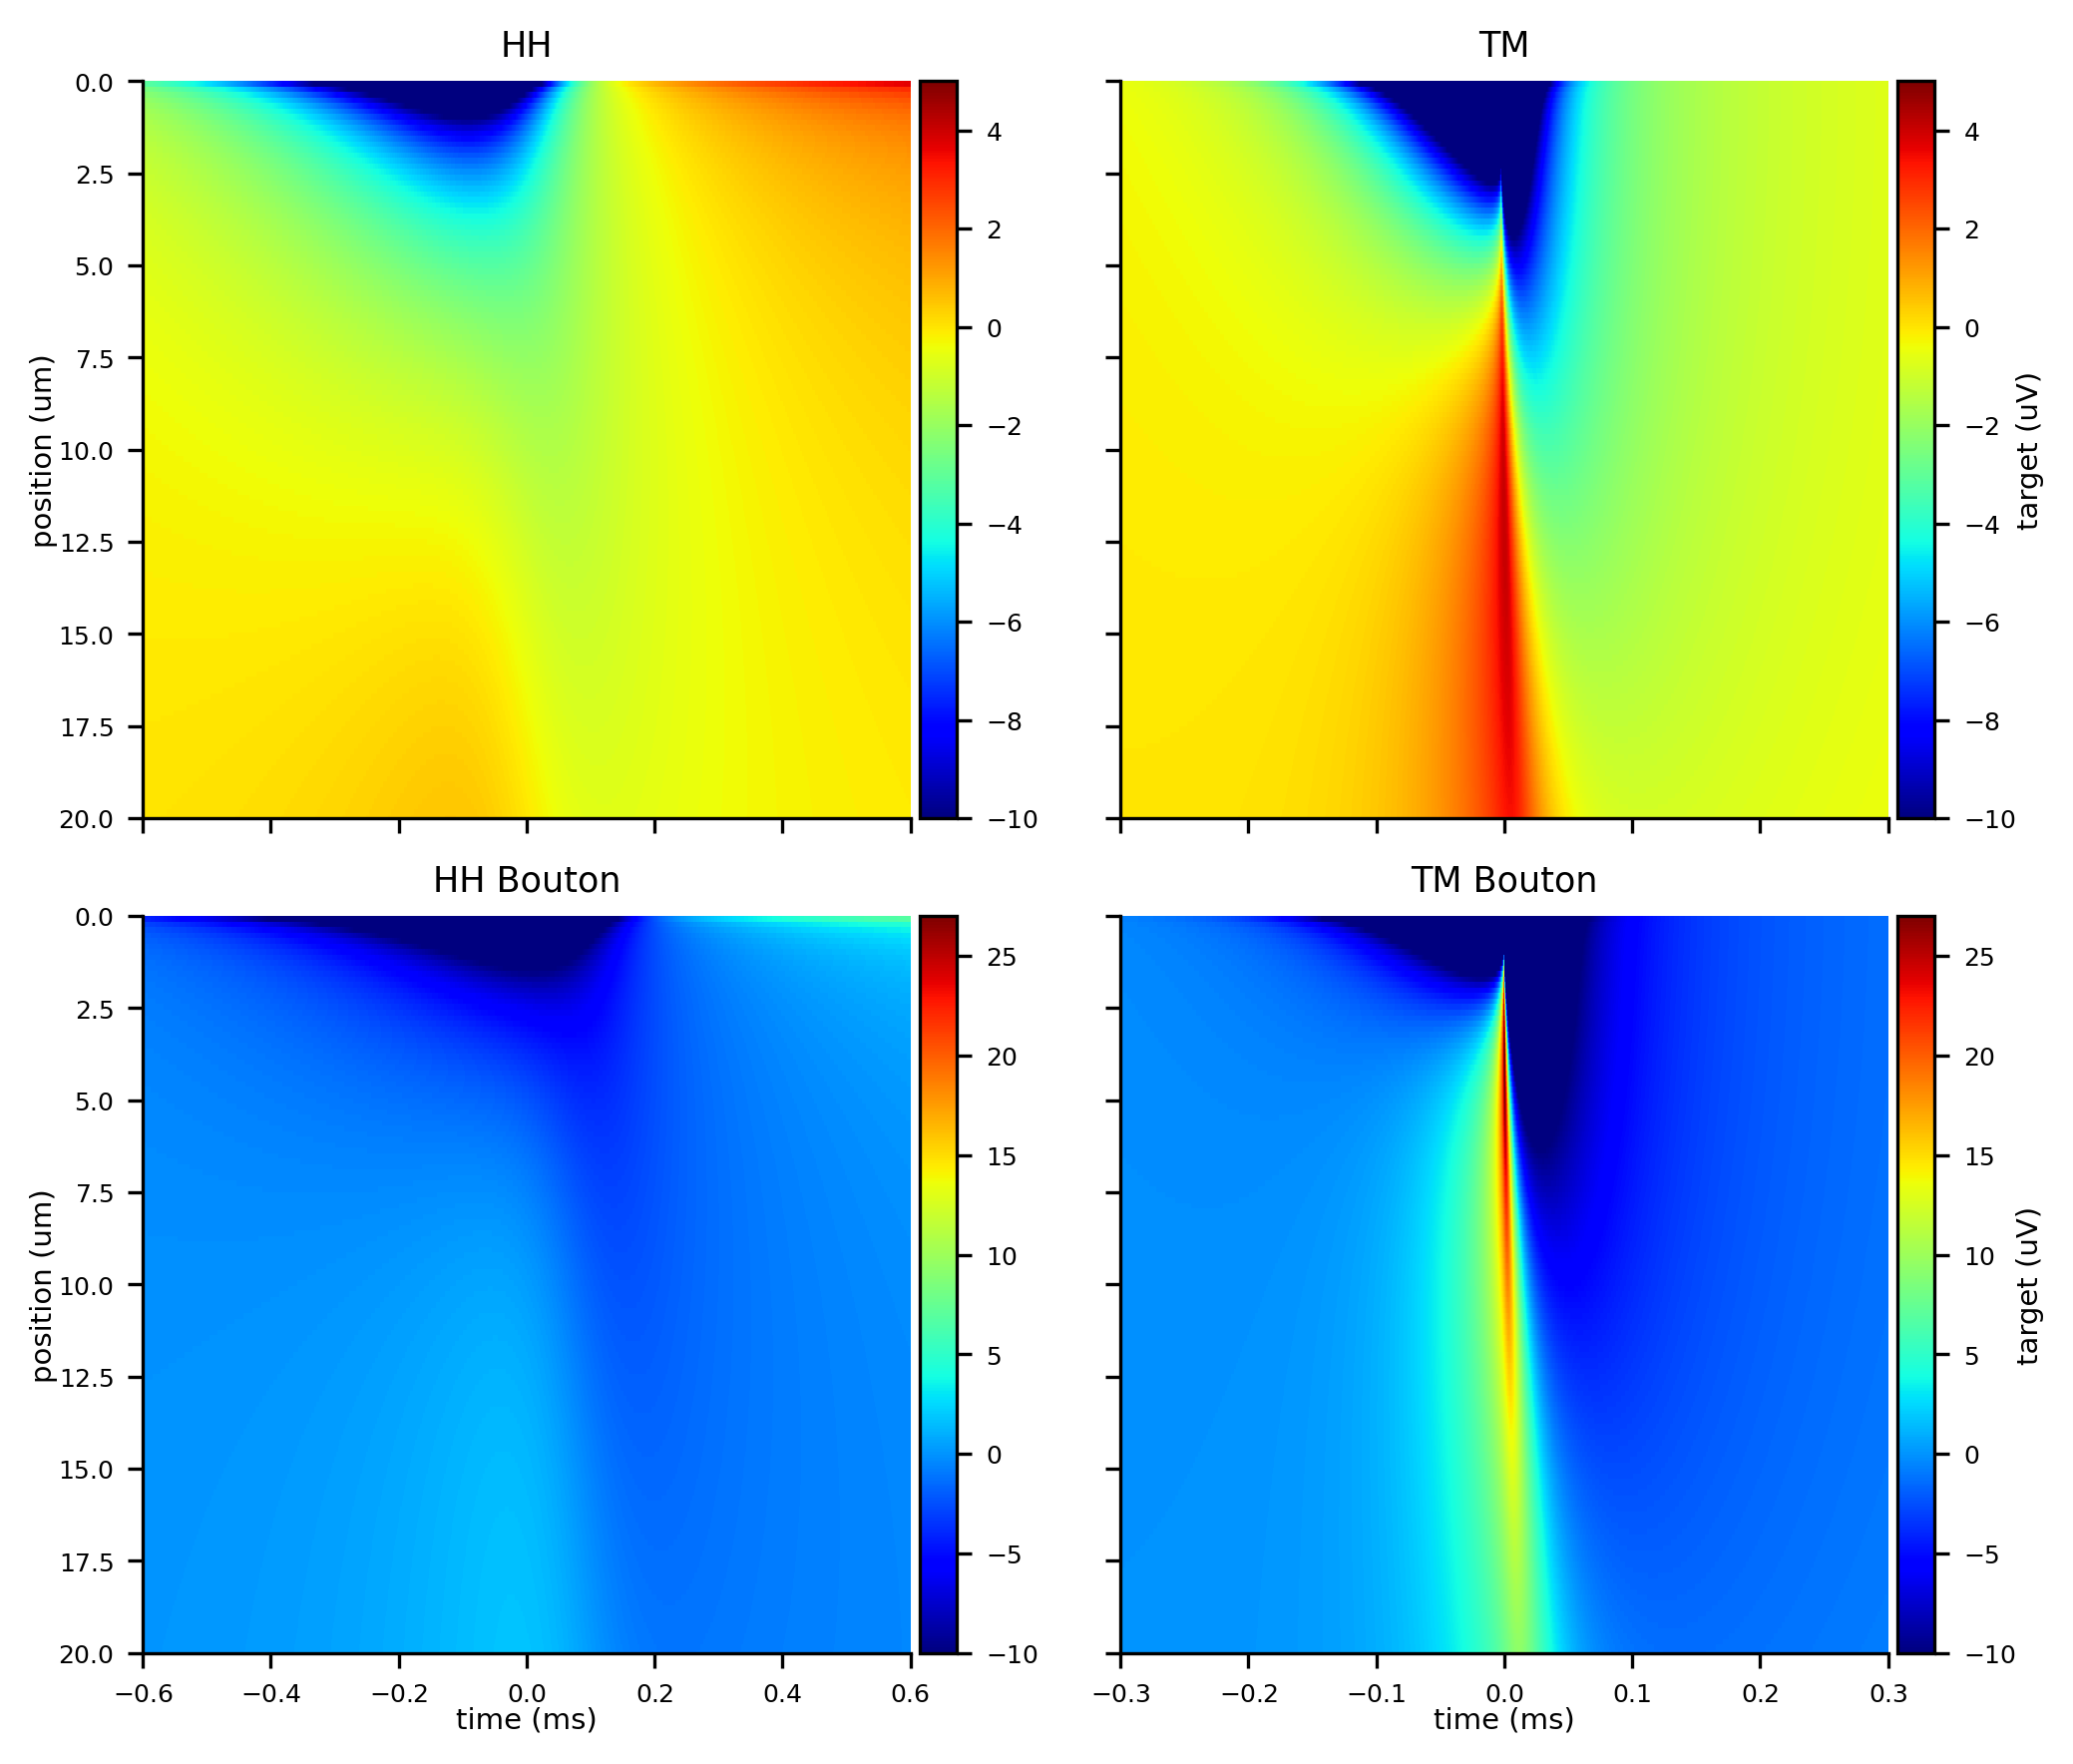

In [10]:
def putimg(title, result, ax, dt=0.6, clbl='target (uV)', **kwargs):
    ax.set_title(title)
    ix, it = find_dist_depol(result)
    t0 = result['target_t'][it]/br.ms
    x0 = result['target_x'][0]/br.um
    
    im0 = ax.imshow(result['target_v']/br.uvolt,
                    extent=[(result['target_t'][0])/br.ms -t0,
                            (result['target_t'][-1])/br.ms -t0,
                            (result['target_x'][-1])/br.um -x0,
                            (result['target_x'][0])/br.um -x0,
                           ],
                    aspect='auto',
                    interpolation='none',
                    vmin=-10,
                    cmap='jet',#'nipy_spectral',
                    **kwargs
                   )
    
    #ax.axhline(result['target_x'][ix]/br.um - x0, ls = '--')
    #ax.axvline(result['target_t'][it]/br.ms - t0, ls = '--')
    ax.set_xlim(-dt, +dt)
    ax.set_ylim(20, 0)
    
    fig.colorbar(im0, ax=ax, pad=0.01, label=clbl)


with plt.style.context('plot_style.txt'):
    cm = 1/2.54 # 11.4 or 17.8
    fig, axs = plt.subplots(2,2, figsize=(17.8*cm,15*cm), sharey=True, sharex='col')
    
    putimg(result=e_results['ee-2k-.1us-.3mmspine-hhss.h5'],
           ax=axs[0,0],
           title='HH',
           clbl='',
           vmax=5)
    putimg(result=e_results["ee-2k-.1us-.3mmspine-hhbb.h5"],
           ax=axs[1,0],
           title='HH Bouton',
           clbl='',
          vmax=27)
    putimg(result=e_results["ee-2k-.1us-.3mmspine-tm450ss.h5"],
           ax=axs[0,1],
           title='TM',
           dt=0.3,
          vmax=5)
    putimg(result=e_results["ee-2k-.1us-.3mmspine-tm450bb.h5"],
           ax=axs[1,1],
           title='TM Bouton',
           dt=0.3,
          vmax=27)

    axs[0,0].set_ylabel('position (um)')
    axs[1,0].set_ylabel('position (um)')

    axs[1,0].set_xlabel('time (ms)')
    axs[1,1].set_xlabel('time (ms)')
    fig.tight_layout()
    plt.savefig("SI-spine.pdf")

# scratch 

In [181]:
result_file='ee-2k-.1us-.3mmspine-hhbb.h5'
result = pel.get_result(datapath+result_file)#, downsampling_factor=10)

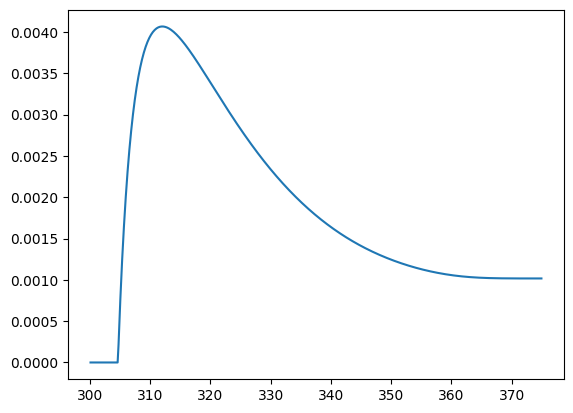

In [237]:
plt.figure()

v = result['target_v'][:,result['target_t']<(4*ms)]/br.mV

# plt.plot(result['target_x']/br.um, v.max(1))

v = result['target_v'][:,result['target_t']<(4*ms)]/br.mV

plt.plot(result['target_x']/br.um, v.max(1))
plt.show()

In [227]:
ic, it = find_dist_depol(result)
ix, it

(8, 1154)

# Old scratch

In [154]:
f = 'ee-2k-.1us-.3mmspine-tm450bb.h5'
result = pel.get_result(datapath+f)#, downsampling_factor=100)
v = result['target_v']/br.uvolt
i_x, i_t = np.unravel_index(np.argmin(v, axis=None), v.shape)
x0, t0 = result['target_x'][i_x], result['target_t'][i_t]

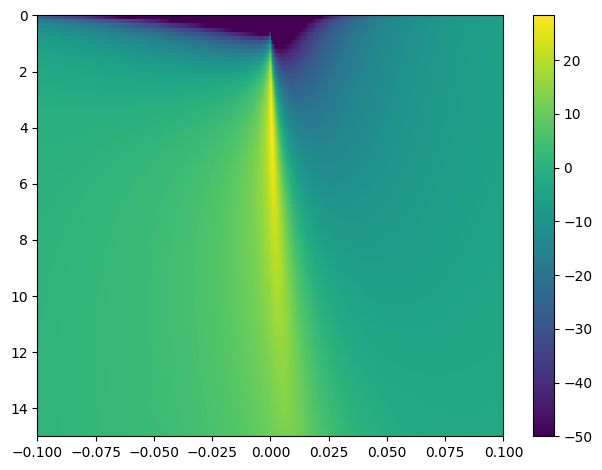

In [159]:
plt.figure()
plt.imshow(v,
           extent=[(result['target_t'][1]-t0)/br.ms,
                   (result['target_t'][-1]-t0)/br.ms,
                   (result['target_x'][-1]-result['target_x'][1])/br.um,
                   0],
           aspect='auto',
           interpolation='none',
           #cmap='Blues',
           vmin=-50,
           #cmap='nipy_spectral'
          )
ax = plt.gca()

ax.set_xlim((-0.1*ms)/ms, (+0.1*ms)/ms)
ax.set_ylim(ymin=15) # mm
plt.colorbar()
plt.tight_layout()
plt.show()

In [101]:
result['target_t'][i_t+200] -result['target_t'][i_t]

20. * usecond

#1f77b4
#ff7f0e
#2ca02c
#d62728
#9467bd


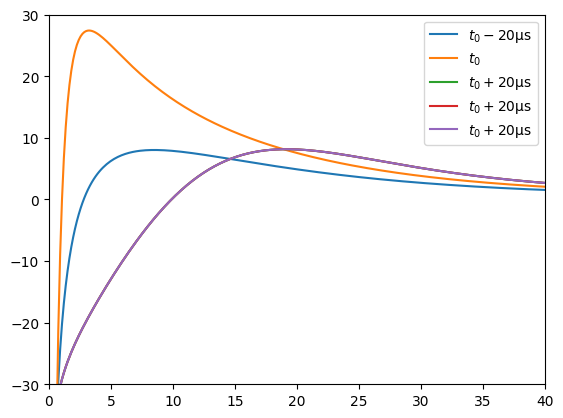

In [119]:
x=200
xs = (result['target_x'] - result['target_x'].min())/br.um
ln = plt.plot(xs, v[:,i_t-x], label = '$t_0 - 20\\mathrm{\mu s}$')
print(ln[0].get_color())
ln = plt.plot(xs, v[:,i_t], label = '$t_0$')
print(ln[0].get_color())
ln = plt.plot(xs, v[:,i_t+x], label = '$t_0 + 20\\mathrm{\mu s}$')
print(ln[0].get_color())
ln = plt.plot(xs, v[:,i_t+x], label = '$t_0 + 20\\mathrm{\mu s}$')
print(ln[0].get_color())
ln = plt.plot(xs, v[:,i_t+x], label = '$t_0 + 20\\mathrm{\mu s}$')
print(ln[0].get_color())
plt.ylim(-30,30)
plt.xlim(0,40)
plt.legend()
plt.show()

In [18]:
with plt.style.context('plot_style.txt'):
    figM, axsM = plt.subplots(1, 3, sharey=True, figsize=(9,2))
    #for morpho_case, ax, axM in zip(['ss', 'sb', 'bs', 'bb'], axs, axsM):
    for morpho_case, axM in zip(['ss', 'bs', 'bb'], axsM):
        for result_file in sorted(result_filenames):
            morpho = result_file.split('.')[-2][-2:]
            model = result_file.split('.')[-2].split('spine-')[-1][:-2]
            if morpho_case != morpho:
                continue
            #if model != 'tm':
            #    continue
            

            result = pel.get_result(datapath+result_file, downsampling_factor=100)
            #
            v, t = result['target_v'], result['target_t']

            ix_min = v.min(1).argmin()
            ix_max = v.max(1).argmax()

            dx = (result['target_x'][1]-result['target_x'][0])
            dt = (result['target_t'][1]-result['target_t'][0])

            x0 = result["target_x"][0]
            x1 = result["target_x"][ix_min] - x0
            x2 = result["target_x"][ix_max] - x0
            print(
                f'{result_file:31s} {v.min().in_unit(br.uvolt, 0):>9s}, '
                f'{v.max().in_unit(br.uvolt, 0):>9s}  '
                f'{x0.in_unit(br.um, 1):>8s}  '
                f'{x1.in_unit(br.um, 2):>8s}  '
                f'{x2.in_unit(br.um, 2):>8s}  '
                f'{dx.in_unit(br.um, 2):>8s}  '
                f'{dt.in_unit(br.us, 2):>8s}  '
            )


            t_min = t[v[ix_min, :].argmin()]
            t_max = t[v[ix_max, :].argmax()]

            lbl = model
            #ln = ax.plot((t-t_min)/ms, v[ix_min, :]/mV, label=lbl)# + ' ' + result['target_x'][ix_min])
            axM.plot((t-t_max)/ms, v[ix_max, :]/br.uvolt, label=lbl)# + ' ' + result['target_x'][ix_max])

    #for axM in axsM:
    #    axM.set_xlim(-0.1, .2)
        #axM.legend()#handlelength=0.1)
            
    axsM[0].set_ylabel("$V_m $(uV)")
    axsM[0].set_xlabel("time (ms)")
    axsM[1].set_xlabel("time (ms)")
    axsM[2].set_xlabel("time (ms)")
    #figM.savefig('../gfx/spine-100nm-d10nm.pdf', bbox_inches='tight')

ee-500-.1us-.3mmspine-hhss.h5     -16. uV,     4. uV  300.3 um     0. um     0. um    0.6 um    10. us  
ee-500-.1us-.3mmspine-rtm1200-0.25msss.h5  -132. uV,     8. uV  300.3 um     0. um     9. um    0.6 um    10. us  
ee-500-.1us-.3mmspine-rtm1200-0.5msss.h5  -132. uV,     8. uV  300.3 um     0. um     9. um    0.6 um    10. us  
ee-500-.1us-.3mmspine-rtm1200-1.0msss.h5  -132. uV,     8. uV  300.3 um     0. um     9. um    0.6 um    10. us  
ee-500-.1us-.3mmspine-rtm1200-2.0msss.h5  -132. uV,     8. uV  300.3 um     0. um     9. um    0.6 um    10. us  
ee-500-.1us-.3mmspine-rtm450-0.25msss.h5   -72. uV,     6. uV  300.3 um     0. um     0. um    0.6 um    10. us  
ee-500-.1us-.3mmspine-rtm450-0.5msss.h5   -61. uV,     4. uV  300.3 um     0. um    12. um    0.6 um    10. us  
ee-500-.1us-.3mmspine-rtm450-1.0msss.h5   -61. uV,     4. uV  300.3 um     0. um   12.6 um    0.6 um    10. us  
ee-500-.1us-.3mmspine-rtm450-2.0msss.h5   -61. uV,     4. uV  300.3 um     0. um   12.6 um    0.6 

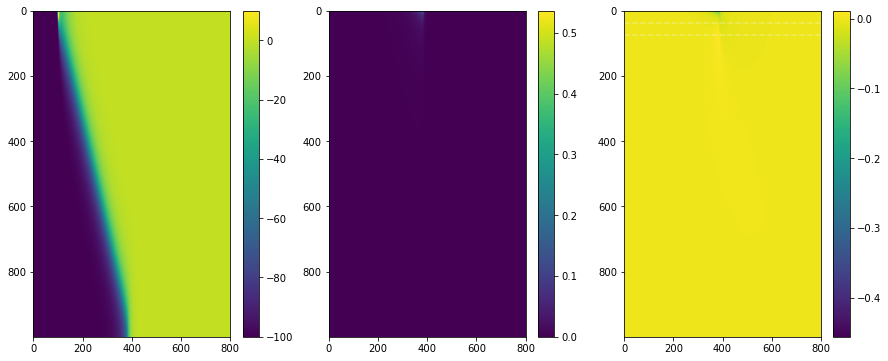

In [46]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharex=True)

result = pel.get_result(datapath+result_filenames[0], downsampling_factor=20)
im = axs[0].imshow(result['source_v']/mV, vmax=10, aspect='auto')
plt.colorbar(im, ax=im.axes)
im = axs[1].imshow(result['v_ext_v']/mV, aspect='auto')
plt.colorbar(im, ax=im.axes)
im = axs[2].imshow(result['target_v']/mV, aspect='auto')
plt.colorbar(im, ax=im.axes)

ix_min = result['target_v'].max(1).argmax()
axs[2].axhline(y=ix_min, ls='--', color='white', alpha=0.3)
axs[2].axhline(y=ix_min//2, ls='--', color='white', alpha=0.3)

tmb       : scaling factor = 1.63
tms       : scaling factor = 2.36
tmb       : scaling factor = 2.52
tms       : scaling factor = 3.47


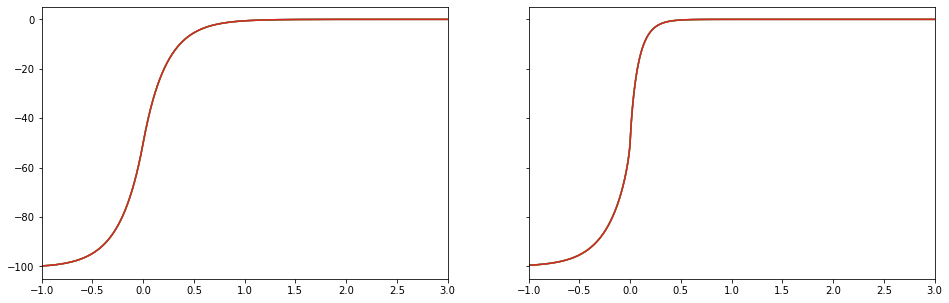

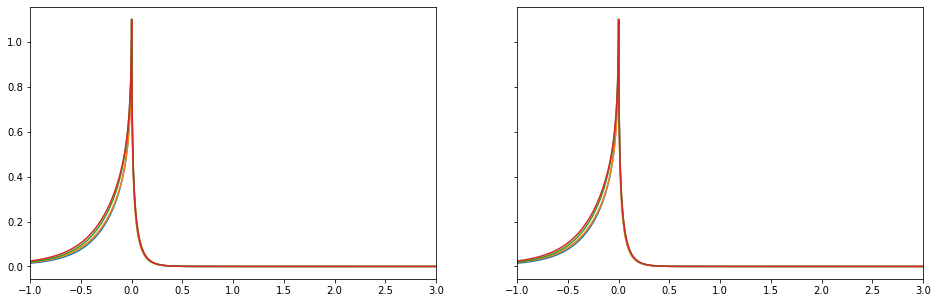

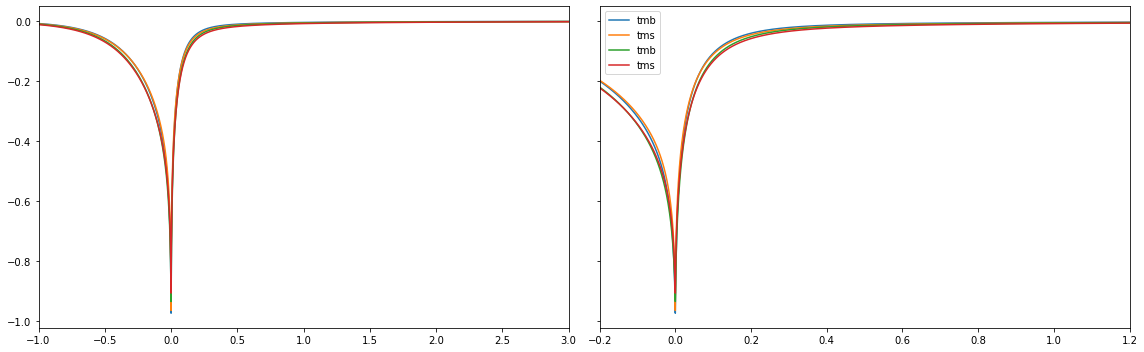

In [45]:
figS, axsS = plt.subplots(1,2, sharey=True, figsize=(16,5))
figE, axsE = plt.subplots(1,2, sharey=True, figsize=(16,5))
fig, axs = plt.subplots(1,2, sharey=True, figsize=(16,5))
for result_file in result_filenames:
    result = pel.get_result(datapath+result_file, downsampling_factor=2)
        
    ix_min = result['target_v'].min(1).argmin()
    ls = '-'
    
    if 'hh' in result_file:
        ls = '--'
        vm_offset = -100*mV
    else:
        vm_offset = 0*mV
 
    if '9' in result_file:
        ls = ':'
    if 'rtm' in result_file:
        ls = '-.'
 
    label=' '.join(result_file[:-3].split('-')[1:])
        
    if True: #Normalize
        vext_max = result['v_ext_v'].max(1)
        prop_peak = vext_max[0]#len(vext_max)//4]
        scaling_f = 1.1*mV/prop_peak
        print(f'{label:10s}: scaling factor = {scaling_f:1.2f}')
    else:
        scaling_f = 1
    
    def pltshifted(t, v, ax, label = label, ls=ls, pin='min', **kwargs):
        if pin == 'min':
            it_min = v.argmin()
        elif pin == 'maxgrad':
            it_min = np.diff(v).argmax()
        elif pin == 'max':
            it_min = v.argmax()
        else:
            1/0
            
        ax.plot((t-t[it_min])/ms, v/mV, label = label, ls=ls, **kwargs)
        ax.set_xlim(-1, 3)
    
    source_n = result['source_v'].shape[0]
    pltshifted(result['source_t'], vm_offset + result['source_v'][source_n//2,:], axsS[0], pin='maxgrad')
    pltshifted(result['source_t'], vm_offset + result['source_v'][-1,:], axsS[1], pin='maxgrad')
    
    pltshifted(result['v_ext_t'], result['v_ext_v'][0,:]*scaling_f, axsE[0], pin='max')
    pltshifted(result['v_ext_t'], result['v_ext_v'][ix_min,:]*scaling_f, axsE[1], pin='max')
    
    pltshifted(result['target_t'], result['target_v'][ix_min//2,:]*scaling_f, axs[0])
    pltshifted(result['target_t'], result['target_v'][ix_min,:]*scaling_f, axs[1])

axs[1].set_xlim(-0.2, 1.2)
axs[1].legend()
plt.tight_layout()

## Source AP analysis

100nm-d100nm-spine-tmbb Simulation:  0.23m/s,  0.012mm
100nm-d100nm-spine-tmbs Simulation:  0.23m/s,  0.012mm
100nm-d100nm-spine-tmsb Simulation:  0.23m/s,  0.020mm
100nm-d100nm-spine-tmss Simulation:  0.23m/s,  0.020mm
100nmspine-hhbb      Simulation:  0.11m/s,  0.031mm
100nmspine-hhbs      Simulation:  0.11m/s,  0.031mm
100nmspine-hhsb      Simulation:  0.11m/s,  0.033mm
100nmspine-hhss      Simulation:  0.11m/s,  0.033mm
100nmspine-tmbb      Simulation:  0.23m/s,  0.012mm
100nmspine-tmbs      Simulation:  0.23m/s,  0.012mm
100nmspine-tmsb      Simulation:  0.23m/s,  0.020mm
100nmspine-tmss      Simulation:  0.23m/s,  0.020mm


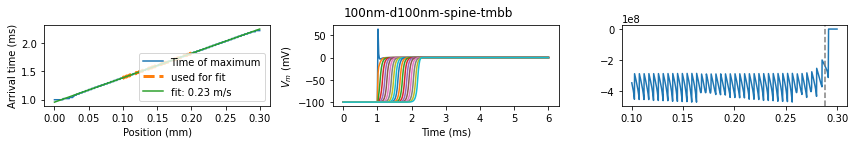

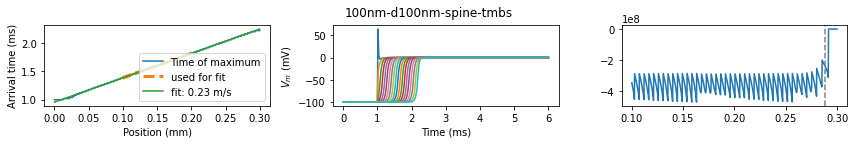

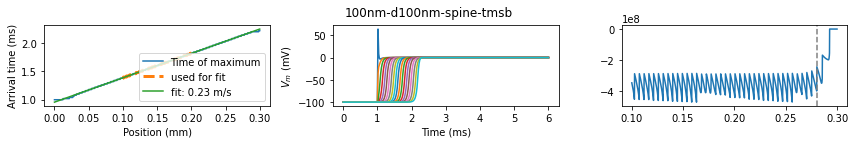

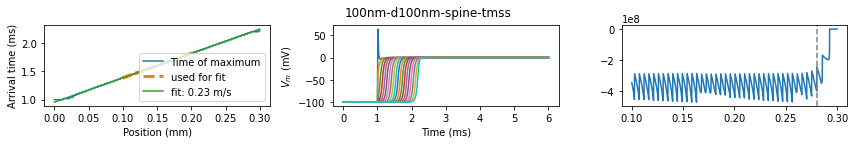

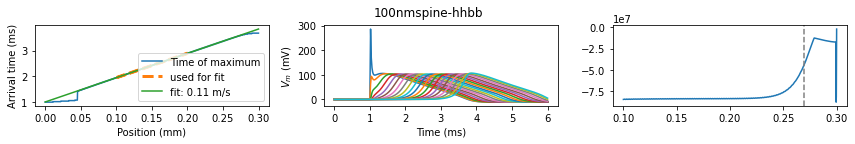

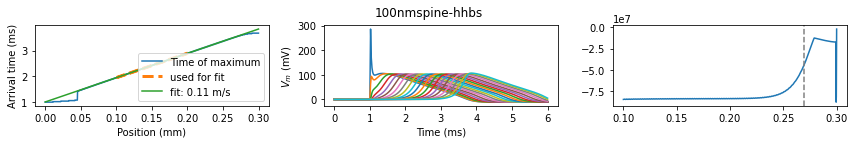

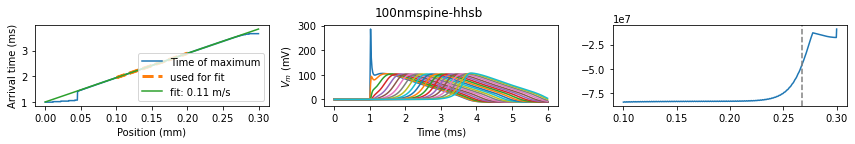

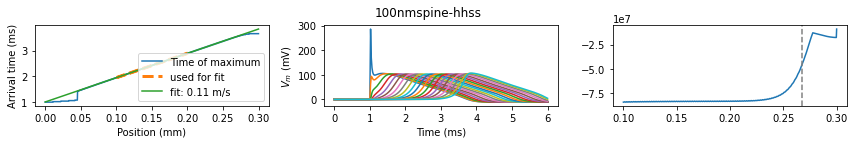

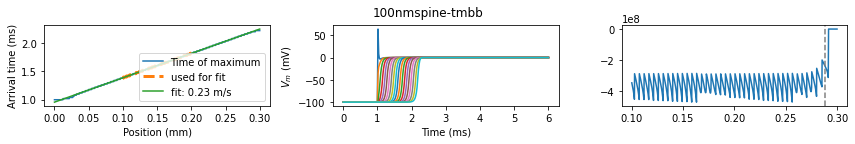

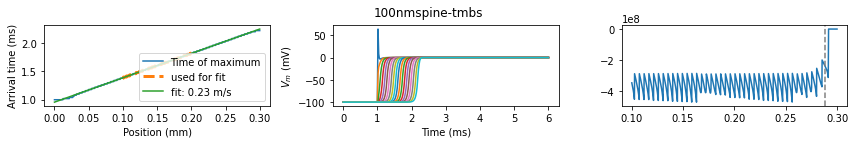

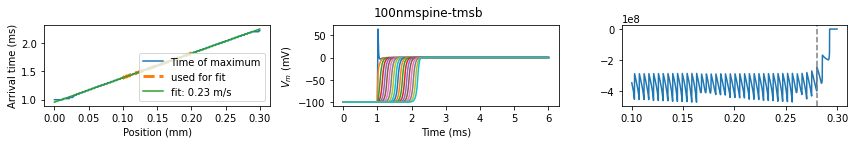

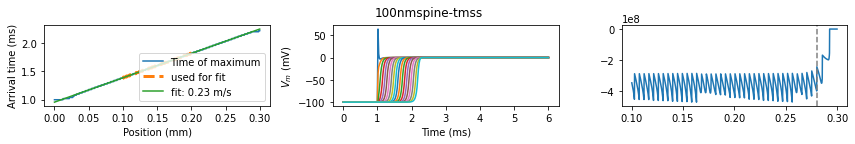

In [30]:
for result_file in result_filenames:
    result = pel.get_result(datapath+result_file, downsampling_factor=20)
    print('%-20s'%result_file.split('.')[0], end=' ')
    
    # Calculate v and lambda_star from simulation
    v_p, lambda_star = pel.get_velocity(M=None,
                           make_plots=True,
                           is_collision=False,
                           time_m=result['source_t'],
                           x_m=result['source_x'],
                           v_m=result['source_v'],
                           figsize=(12,2)
                          )
    plt.tight_layout()
    plt.suptitle(result_file.split('.')[0]);

100nm-d100nm-spine-tmss.h5     -245. uV,     4. uV   300. um     0. um   11.4 um   0.15 um     1. us  
100nm-d10nm-spine-tmss.h5     -1339. uV,    14. uV  299.9 um     0. um   2.55 um   0.15 um     1. us  
100nmspine-hhss.h5              -16. uV,     4. uV  300.3 um     0. um     0. um   0.15 um     1. us  
100nmspine-tmss.h5             -105. uV,     3. uV  300.3 um     0. um   13.8 um   0.15 um     1. us  
100nm-d100nm-spine-tmsb.h5     -216. uV,    12. uV   300. um     0. um   4.05 um   0.15 um     1. us  
100nm-d10nm-spine-tmsb.h5     -1229. uV,    97. uV  299.9 um     0. um    0.9 um   0.15 um     1. us  
100nmspine-hhsb.h5              -15. uV,     4. uV  300.3 um     0. um     0. um   0.15 um     1. us  
100nmspine-tmsb.h5              -92. uV,     6. uV  300.3 um     0. um    8.7 um   0.15 um     1. us  
100nm-d100nm-spine-tmbs.h5     -553. uV,    10. uV   300. um     0. um    7.2 um   0.15 um     1. us  
100nm-d10nm-spine-tmbs.h5     -3632. uV,    53. uV  299.9 um     0. um   

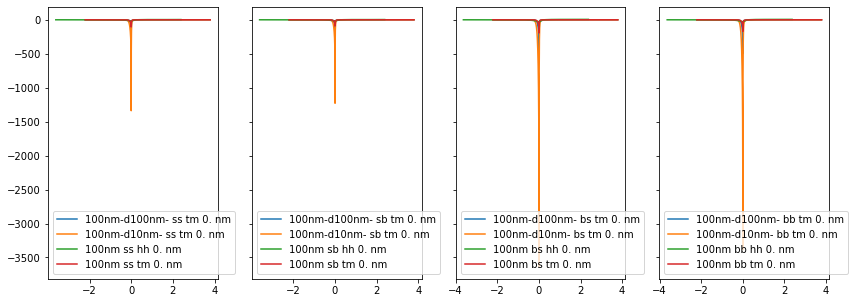

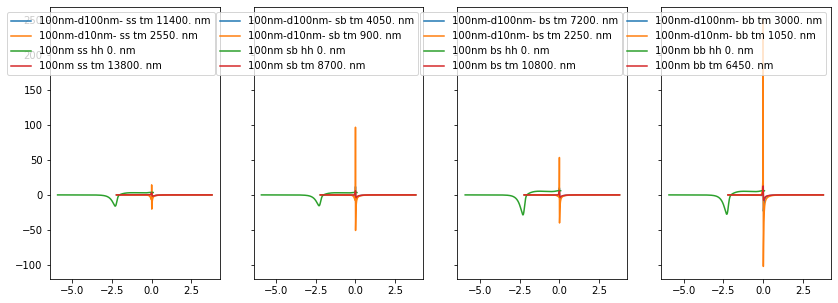

In [34]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(14,5))
figM, axsM = plt.subplots(1, 4, sharey=True, figsize=(14,5))
for morpho_case, ax, axM in zip(['ss', 'sb', 'bs', 'bb'], axs, axsM):
    for result_file in sorted(result_filenames):
        lbl1, lbl2 = result_file[:-3].split('spine-')
        model, morpho = lbl2[:-2], lbl2[-2:]
        if morpho_case != morpho:
            continue
            
        downsampling_factor = 1
        
        result = pel.get_result(datapath+result_file, downsampling_factor= downsampling_factor)
        #
        v, t = result['target_v'], result['target_t']

        ix_min = v.min(1).argmin()
        ix_max = v.max(1).argmax()
        
        dx = (result['target_x'][1]-result['target_x'][0])
        dt = (result['target_t'][1]-result['target_t'][0])
        
        x0 = result["target_x"][0]
        x1 = result["target_x"][ix_min] - x0
        x2 = result["target_x"][ix_max] - x0
        print(
            f'{result_file:29s} {v.min().in_unit(br.uvolt, 0):>9s}, '
            f'{v.max().in_unit(br.uvolt, 0):>9s}  '
            f'{x0.in_unit(br.um, 1):>8s}  '
            f'{x1.in_unit(br.um, 2):>8s}  '
            f'{x2.in_unit(br.um, 2):>8s}  '
            f'{dx.in_unit(br.um, 2):>8s}  '
            f'{dt.in_unit(br.us, 2):>8s}  '
        )
        
        
        t_min = t[v[ix_min, :].argmin()]
        t_max = t[v[ix_max, :].argmax()]
        
        lbl = lbl1 +' '+ morpho_case +' '+ model +' '+ x1.in_unit(br.nmeter, 0)
        ln = ax.plot((t-t_min)/ms, v[ix_min, :]/br.uvolt, label=lbl)# + ' ' + result['target_x'][ix_min])
        
        lbl = lbl1 +' '+ morpho_case +' '+ model +' '+ x2.in_unit(br.nmeter, 0)
        axM.plot((t-t_max)/ms, v[ix_max, :]/br.uvolt, color=ln[0].get_color(), label=lbl)# + ' ' + result['target_x'][ix_max])

        ax.legend()#handlelength=0.1)
        axM.legend()#handlelength=0.1)
        #ax.set_xlim(-0.3, .3)
        #axM.set_xlim(-0.3, .3)
